In [1]:
import pandas as pd
full_df = pd.read_csv(open('/Volumes/MyPassport/text privacy/10_06.csv', 'r'), sep='\t')

In [2]:
full_df = full_df.dropna()

In [3]:
full_df = full_df.reset_index()

In [4]:
full_df = full_df[full_df.columns[3:]]

In [5]:
full_df.head()

,apk_name,apk_name_file,text,category,label_category,USER_IDENTIFIERS,UNIQUE_IDENTIFIER,SAFE,OTHERS,LOCATION_INFORMATION,ERROR
0,jp.ne.ibis.ibispaintx.app,ART_AND_DESIGN_jp.ne.ibis.ibispaintx.app.txt,google analytics this document is translated f...,ART_AND_DESIGN,"['(NO_CATEGORY)', '(OTHERS)']",0,0,0,1,0,0
1,com.canva.editor,ART_AND_DESIGN_com.canva.editor.txt,this policy sets out how canva collects and us...,ART_AND_DESIGN,['(NO_CATEGORY)'],0,0,0,1,0,0
2,com.vblast.flipaclip,ART_AND_DESIGN_com.vblast.flipaclip.txt,the types of information we may collect or tha...,ART_AND_DESIGN,"['(NO_CATEGORY)', '(OTHERS)']",0,0,0,1,0,0
3,com.wallsstudio.bnk48,ART_AND_DESIGN_com.wallsstudio.bnk48.txt,walls studio wallpaper does collect anonymous ...,ART_AND_DESIGN,"['(NO_CATEGORY)', '(OTHERS)']",0,0,0,1,0,0
4,com.medibang.android.paint.tablet,ART_AND_DESIGN_com.medibang.android.paint.tabl...,services sign up ・他のサービス（google、facebook、twitt...,ART_AND_DESIGN,['(SAFE)'],0,0,1,0,0,0


In [6]:
target_count = full_df.USER_IDENTIFIERS.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

Class 0: 8723
Class 1: 1190
Proportion: 7.33 : 1


In [7]:
# Class count
count_class_0, count_class_1 = full_df.USER_IDENTIFIERS.value_counts()

# Divide by class
full_df_0 = full_df[full_df['USER_IDENTIFIERS'] == 0]
full_df_1 = full_df[full_df['USER_IDENTIFIERS'] == 1]

Random under-sampling:
1    1190
0    1190
Name: USER_IDENTIFIERS, dtype: int64


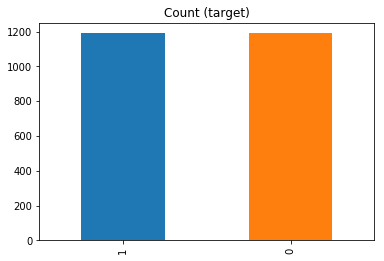

In [8]:
df_class_0_under = full_df_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, full_df_1], axis=0)

print('Random under-sampling:')
print(df_test_under.USER_IDENTIFIERS.value_counts())

df_test_under.USER_IDENTIFIERS.value_counts().plot(kind='bar', title='Count (target)');

In [9]:
pd.crosstab([df_test_under.category], [df_test_under.USER_IDENTIFIERS], margins=True)

USER_IDENTIFIERS,0,1,All
category,,,
ART_AND_DESIGN,23,34,57
AUTO_AND_VEHICLES,27,13,40
BEAUTY,28,74,102
BOOKS_AND_REFERENCE,9,6,15
BUSINESS,10,8,18
COMICS,19,58,77
COMMUNICATION,28,44,72
DATING,13,31,44
EDUCATION,31,26,57


In [10]:
X,y = df_test_under.text,df_test_under[full_df.columns[5:6]]

In [11]:
import nltk
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk import word_tokenize
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(min_df=0.020,max_df=0.5,  max_features=30000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,
            stop_words = 'english')

x =  vectorizer.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(x.toarray(), y, test_size = 0.30, random_state = 45)


In [13]:
categories = list(y.columns.values)

In [14]:
categories

['USER_IDENTIFIERS']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC  
import scikitplot as skplt
import itertools  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=20):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print

    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

In [26]:
sns.set()
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                             ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1)),
                           ])

labels = ['1', '0']
LogReg_pipeline.fit(text_train, sent_train['USER_IDENTIFIERS'])

# calculating test accuracy
prediction = LogReg_pipeline.predict(text_test)
cm = confusion_matrix(sent_test['USER_IDENTIFIERS'], prediction)
print(cm)
print('Test accuracy is {}'.format(accuracy_score(sent_test['USER_IDENTIFIERS'], prediction)))
print(classification_report(sent_test['USER_IDENTIFIERS'], prediction, labels=list(set(sent_test['USER_IDENTIFIERS'])), target_names=['NEGATIVE', 'POSITIVE']))
print("\n")

[[256  93]
 [136 229]]
Test accuracy is 0.6792717086834734
             precision    recall  f1-score   support

   NEGATIVE       0.65      0.73      0.69       349
   POSITIVE       0.71      0.63      0.67       365

avg / total       0.68      0.68      0.68       714





Confusion matrix, without normalization
[[256  93]
 [136 229]]
None
0 -1.07916838291 entrycontent
0 -1.03386431579 development
0 -1.02582350932 use cookies
0 -0.934754768887 personal information collect
0 -0.85703248819 virtual
0 -0.786856757084 update
0 -0.756179461129 ip addresses
0 -0.743211314718 posting
0 -0.741080598366 advertising
0 -0.725630275174 terms
0 -0.700661602151 published
0 -0.689043965226 immediately
0 -0.684449693332 application
0 -0.682673947447 collect personal
0 -0.681255717916 digital
0 -0.674075908366 app
0 -0.649168296227 computer
0 -0.639685025576 ssl
0 -0.616211439859 rd
0 -0.616106018116 store personal
1 1.63458288548 account
1 1.17762011542 content
1 1.06628706515 social
1 0.992168672252 number
1 0.989658284022 website
1 0.949276941348 andor
1 0.936460750212 track
1 0.894826849262 navigation
1 0.878008152736 relevant
1 0.852366394705 create unique
1 0.807554318276 limited
1 0.802099339788 user account
1 0.794392151528 flurry
1 0.794010250091 location inform

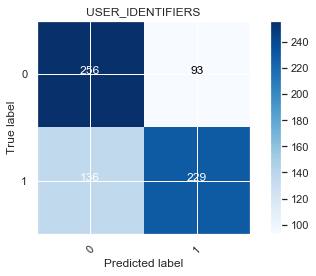

In [30]:
print(plot_confusion_matrix(cm, classes=['0','1'],
                          title='USER_IDENTIFIERS'))
print(most_informative_feature_for_binary_classification(vectorizer, LogReg_pipeline.named_steps['clf']))